Practical 5

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Question 1

In [4]:
data_wide = pd.read_pickle('mortality_wide.pkl')
data_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


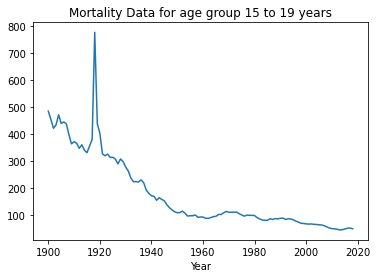

In [5]:

#Create a line plot using wide data
age_15_19 = data_wide['15-19 Years']

plt.figure()
age_15_19.plot(kind='line', title="Mortality Data for age group 15 to 19 years")
plt.legend().remove() #remove legend
plt.show()

Question 2

<Figure size 432x288 with 0 Axes>

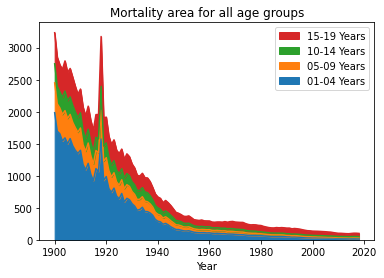

In [66]:

plt.figure()
data_wide.plot(kind='area', title="Mortality area for all age groups")

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Reverse the order of handles and labels
handles, labels = handles[::-1], labels[::-1]

# Create the legend with reversed order
plt.legend(handles, labels, loc='best', bbox_to_anchor=(1, 1))  # Correct argument is bbox_to_anchor
plt.show()



Question 3

In [12]:
#Bar plot for 1900, 1950, and 2000
data_long = pd.read_pickle('mortality_long.pkl')
data_long.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


<Figure size 432x288 with 0 Axes>

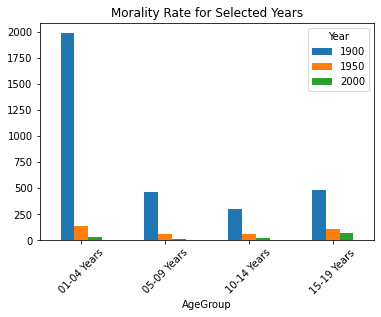

In [15]:
subset = data_long[data_long['Year'].isin([1900, 1950, 2000])]

plt.figure()
subset.pivot("AgeGroup", "Year", "DeathRate").plot(kind='bar', title="Morality Rate for Selected Years")
plt.xticks(rotation=45)
plt.show()

Question 4

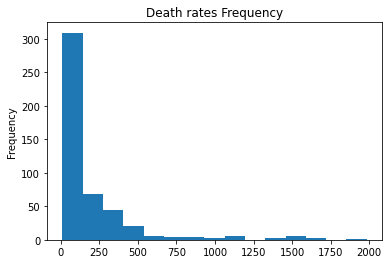

In [16]:
plt.figure()
data_long['DeathRate'].plot(kind='hist', bins=15, title="Death rates Frequency")
plt.show()

Question 5

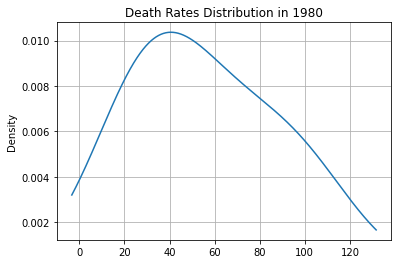

In [17]:
data_1980 = data_long[data_long['Year'] == 1980]

plt.figure()
data_1980['DeathRate'].plot(kind='density', title="Death Rates Distribution in 1980")
plt.grid(True)
plt.show()

Question 6

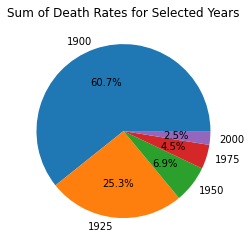

In [21]:
years =[1900, 1925, 1950, 1975, 2000]
data_pie = data_long[data_long['Year'].isin(years)].groupby('Year')['DeathRate'].sum()

plt.figure()
data_pie.plot(kind='pie', autopct='%1.1f%%', title="Sum of Death Rates for Selected Years")
plt.ylabel("") #Hide y-axis label
plt.show()

Question 7

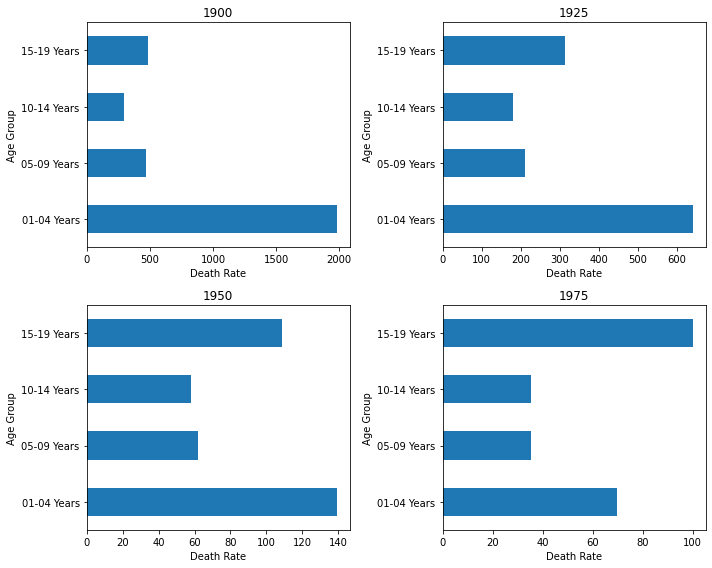

In [24]:

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
years = [1900, 1925, 1950, 1975]

# Loop through years and plot
for i, year in enumerate(years):
    data_year = data_long[data_long['Year'] == year]
    ax = axes[i // 2, i % 2]
    data_year.plot(kind='barh', x='AgeGroup', y='DeathRate', ax=ax, legend=False, title=f"{year}")
    ax.set_xlabel("Death Rate")  
    ax.set_ylabel("Age Group")  

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Question 8

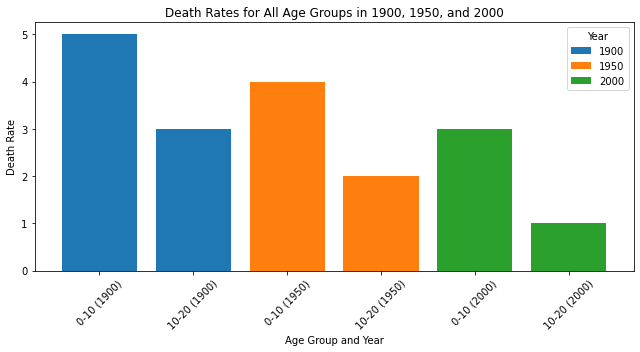

In [42]:

# Filter data for specific years
selected_years = [1900, 1950, 2000]
data_filtered = data_long[data_long['Year'].isin(selected_years)]

# Create the plot
fig, ax = plt.subplots(figsize=(9, 5))  # Aspect ratio: width/height = 1.8

for year in selected_years:
    subset = data_filtered[data_filtered['Year'] == year]
    ax.bar(
        subset['AgeGroup'] + f" ({year})",  # Combine age group and year for labeling
        subset['DeathRate'],
        label=f"{year}"
    )

# Add labels, title, and legend
ax.set_xlabel("Age Group and Year")
ax.set_ylabel("Death Rate")
ax.set_title("Death Rates for All Age Groups in 1900, 1950, and 2000")
ax.legend(title="Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

# Show plot
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

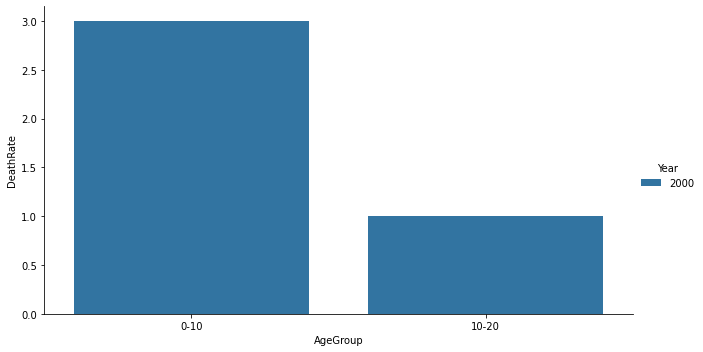

In [44]:
plt.figure()
sns.catplot(data=subset, x='AgeGroup', y='DeathRate', hue='Year', kind='bar', aspect=1.8)
plt.show()

Question 9

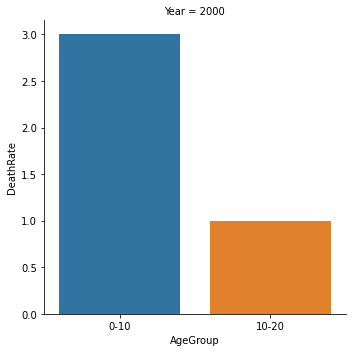

In [ ]:
sns.catplot(data=subset, x='AgeGroup', y='DeathRate', col='Year',kind='bar', col_wrap=1)
plt.show()

Question 10

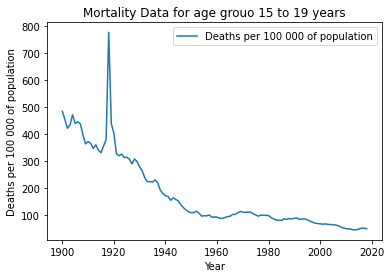

In [ ]:

age_15_19 = data_wide['15-19 Years']
plt.figure()
sns.lineplot(data=age_15_19, label="Deaths per 100 000 of population").set(title="Mortality Data for age grouo 15 to 19 years")
plt.ylabel("Deaths per 100 000 of population")
plt.show()

Question 11

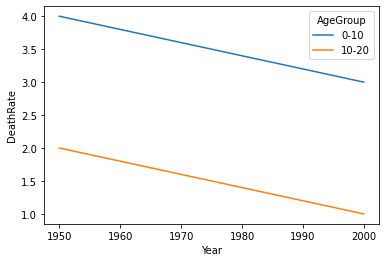

In [52]:
data_50_00 = data_long[(data_long['Year'] >= 1950 ) & (data_long['Year'] <= 2000)]

plt.figure()
sns.lineplot(data=data_50_00, x='Year', y='DeathRate', hue='AgeGroup')
plt.show()

Question 12

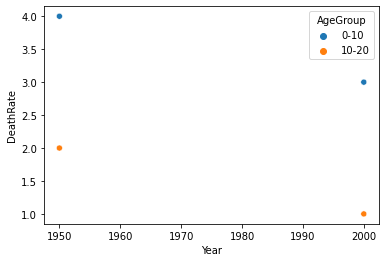

In [53]:
plt.figure()
sns.scatterplot(data=data_50_00, x ='Year', y='DeathRate', hue='AgeGroup')
plt.show()

Question 13

In [62]:
print(data_long['Year'].unique())


[1900 1950 2000]


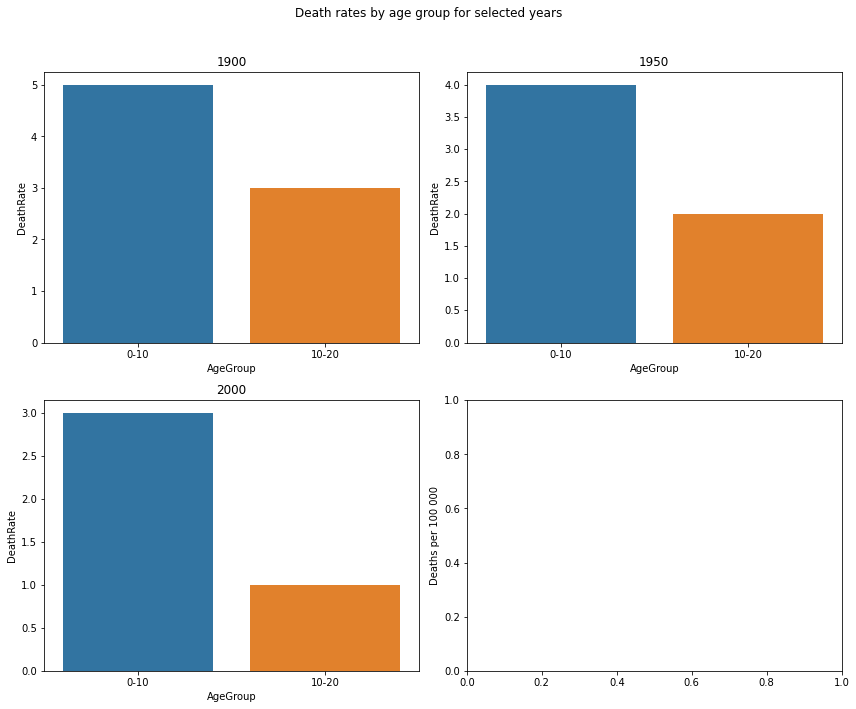

In [65]:
years = [1900, 1950, 2000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, year in enumerate (years):
    data_year =data_long[data_long['Year']==year]
    
    # Skip if data_year is empty (this should no longer happen)
    if data_year.empty:
        print(f"No data available for year {year}. Skipping...")
        continue
    
    ax =  axes[i//2, i%2]
    sns.barplot(data=data_year, x='AgeGroup', y='DeathRate', ax=ax).set(title=f"{year}")

plt.suptitle("Death rates by age group for selected years")
plt.ylabel("Deaths per 100 000")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Question13.png")
plt.show()